<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature engineering

The act of taking raw data and extracting features for machine learning

Most ML work with tabular data. 

Incorporate feature engineering into the data science workflow.

Many ML models assume the data to be distributed normally.

You need to transform raw data into the format fot the ML model.

** Data manipulation and feature engineering is the most important aspect of the project.**



## Importing, shape, dtypes and columns

In [ ]:
import pandas as pd

In [ ]:
# Stack Overflow Survey Responses (Modified)

path = 'https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv'

df = pd.read_csv(path)
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [ ]:
print(df.shape)
print(df.dtypes)
print(df.columns)

(999, 11)
SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object
Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby', 'Country',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary'],
      dtype='object')


## Selecting specific data types

Often a data set will contain columns with several different data types (like the one you are working with). The majority of machine learning models require you to have a consistent data type across features. Similarly, most feature engineering techniques are applicable to only one type of data at a time. For these reasons among others, you will often want to be able to access just the columns of certain types when working with a DataFrame.

In [ ]:
# Selecting specific data types

df_ints = df.select_dtypes(include=['int','float'])

df_strs = df.select_dtypes(include=['object'])

print(df_ints.columns)
df_strs.columns

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


Index(['SurveyDate', 'FormalEducation', 'Hobby', 'Country', 'VersionControl',
       'Gender', 'RawSalary'],
      dtype='object')

## Dealing with categorical features

Represent groups that are qualitative in nature, like country of birth, colors, etc. 

You need to encode categorical features for the computer to understand it. 

From qualitative to quantitative.

Cannot allocate random numbers to each category. We need additionally binary features:

1- One hot encoding (.get_dummies in pandas). Creates explainable features.

2 - Dummy encoding, creates n-1 features for n categories  (.get_dummies in pandas with drop_first=True). Creates necessary features with no duplication.

1 and 2 are different and often confused.




### Dealing with uncommon categories 

**Limit your columns and then get_dummies**

You limit your columns by counting them and seeing what values will I include.

Am I going to include 'I never completed any formal education' that has only 1 sample for that category?. This is when categories have **uneven distribution**

Some features can have many different categories but a very uneven distribution of their occurrences.

You can get: 'I never completed any formal education' + Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.) + Primary/elementary school  into only one category of **"NO relevant education"** for example. 

In [ ]:
df['FormalEducation'].value_counts()[df['FormalEducation'].value_counts()<50].index

Index(['Associate degree', 'Other doctoral degree (Ph.D. Ed.D.. etc.)',
       'Professional degree (JD. MD. etc.)', 'Primary/elementary school',
       'I never completed any formal education'],
      dtype='object')

In [ ]:
education_categ = df['FormalEducation']
education_counts = education_categ.value_counts()
display(education_counts)

categories_to_change = education_counts[education_counts <50].index
print(categories_to_change)

mask = education_categ.isin(categories_to_change)

education_categ[mask] = 'Other'

print(education_counts)

Bachelor's degree (BA. BS. B.Eng.. etc.)                                              482
Master's degree (MA. MS. M.Eng.. MBA. etc.)                                           241
Some college/university study without earning a degree                                130
Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.)     58
Associate degree                                                                       33
Other doctoral degree (Ph.D. Ed.D.. etc.)                                              30
Professional degree (JD. MD. etc.)                                                     19
Primary/elementary school                                                               5
I never completed any formal education                                                  1
Name: FormalEducation, dtype: int64

Index(['Associate degree', 'Other doctoral degree (Ph.D. Ed.D.. etc.)',
       'Professional degree (JD. MD. etc.)', 'Primary/elementary school',
       'I never completed any formal education'],
      dtype='object')
Bachelor's degree (BA. BS. B.Eng.. etc.)                                              482
Master's degree (MA. MS. M.Eng.. MBA. etc.)                                           241
Some college/university study without earning a degree                                130
Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.)     58
Associate degree                                                                       33
Other doctoral degree (Ph.D. Ed.D.. etc.)                                              30
Professional degree (JD. MD. etc.)                                                     19
Primary/elementary school                                                               5
I never completed any formal education                        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df = pd.get_dummies(df, drop_first=True, columns=['Gender','Country','FormalEducation'], prefix=['G','C','FE'])
df

,SurveyDate,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,RawSalary,G_Female;Male,G_Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming,G_Female;Transgender,G_Male,G_Male;Non-binary. genderqueer. or gender non-conforming,G_Non-binary. genderqueer. or gender non-conforming,G_Transgender,C_India,C_Ireland,C_Russia,C_South Africa,C_Spain,C_Sweeden,C_UK,C_USA,C_Ukraine,FE_Master's degree (MA. MS. M.Eng.. MBA. etc.),FE_Other,FE_Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.),FE_Some college/university study without earning a degree
0,2/28/18 20:20,NaN,Yes,NaN,Git,21,13,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,6/28/18 13:26,70841.0,Yes,7.0,Git;Subversion,38,9,"70,841.00",0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,6/6/18 3:37,NaN,No,8.0,Git,45,11,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,5/9/18 1:06,21426.0,Yes,NaN,Zip file back-ups,46,12,"21,426.00",0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,4/12/18 22:41,41671.0,Yes,8.0,Git,39,7,"£41,671.00",0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,NaN,Yes,NaN,Subversion,45,10,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
995,4/14/18 15:31,58746.0,No,8.0,Git,27,16,"58,746.00",0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
996,3/21/18 6:34,55000.0,Yes,NaN,Git,54,16,"$55,000.00",0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
997,2/5/18 20:01,NaN,Yes,NaN,Git;Subversion,23,9,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Numeric features

Age, price, counts, coordinates, etc.

Possible feature engineering steps: 

1- Ask if the magnitude of the feature is its most important trait, or just its direction. Maybe you don't need, how many times a person went to jail 0,1,2,3,4,5,6,etc but maybe its better to know if never went to jail (0), once or had some problems (1 and 2) or repeated actions (>=3). Another example are violations of restaurant municipal policies, any violation, one vaiolation or a repeat offender. You can create a multiple categorical feature or a binary category. 0 no violation, 1 has violated at least once.



### Binary transformation for numerical (can apply for categorical binary)

In [ ]:
# Convert into a binary feature

# Create the columns
df['Binary_Violation'] = 0

#
df.loc[df['Number_of_violations']>0, 'Binary_Violation' ] = 1

# or I could do the following:
df['Binary_Violation'] = df['Number_of_violations'].apply(lambda val: 0 if row == 0 else 1 )




KeyError: ignored

In [ ]:
# Hobby columns is not numerical but we are going to transform it into binary

df['Hobby'] = df['Hobby'].apply(lambda val: 0 if val == 'No' else 1)

df['Hobby'].head()

### Binning numeric variables with more than two bins

Age, wage brackets for example. Where exact numbers are less relevant than the general magnitude of the value. 





Binarizing columns
While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column.

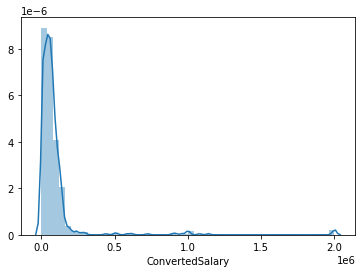

In [ ]:
# For our dataset, we should transform 'ConvertedSalary' into a multicategory numerical format.
# For this, we need to perform binning and first see the distribution.

import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df['ConvertedSalary'])
plt.show()

#### Binning with predefined boundaries

In [ ]:
# Create 3 binns for ConvertedSalary
# From 0 to $30000, up to $50000 and more than $50000


# Binning with predefined boundaries.


import numpy as np

# You can label with integers or with strings like in this case
df['Binned_ConvertedSalary'] = pd.cut(df['ConvertedSalary'],bins=[-np.inf,30000,70000,np.inf],labels=['Low', 'Medium', 'High'])

# Is your binning well distributed? YES
df['Binned_ConvertedSalary'].value_counts()




High      249
Medium    231
Low       185
Name: Binned_ConvertedSalary, dtype: int64

#### Evenly spaced bins

In [ ]:
# If we want to create 5 even spaced bins our code would be:

# Bin the continuous variable ConvertedSalary into 5 bins
df['equal_binned'] = pd.cut(df['ConvertedSalary'], 5)

# After binning we see ig we have even distributed categories.
df['equal_binned'].value_counts()

# In this case we see that cutting in evenly spaced bins it's not the best approach.

(-2000.0, 400000.0]       645
(800000.0, 1200000.0]       9
(400000.0, 800000.0]        6
(1600000.0, 2000000.0]      5
(1200000.0, 1600000.0]      0
Name: equal_binned, dtype: int64

## Missing values

How to deal with them.

Real world data often has noise and omissions.:

* Data not being collected properly
* Collection and management errors
* Data inentionally being omitted (by users)

Missing data is extremely important! 

Some missing data can imply that the value is zero.


### Locate missing values

In [ ]:
#Calculate the columns that have missing values

null_columns = df.isnull().sum()>0
df.isnull().sum()[null_columns]

ConvertedSalary               334
StackOverflowJobsRecommend    512
RawSalary                     334
Binned_ConvertedSalary        334
equal_binned                  334
dtype: int64

### missing values: Complete case analysis or listwise deletion



#### Listwise deletion (droping)

Droping all rows that has at least one NaN value

Issues of deletion:

*It deletes valid data points

*Relies on randomness

*Reduces information

In [ ]:
# Dropping all rows that has at least one NaN value
df = df.dropna(how='any')

In [ ]:
# Dropping all rows that has at least one NaN value in a particular feature

df.dropna(subset=['ConvertedSalary'])


,SurveyDate,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,G_Female;Male,G_Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming,G_Female;Transgender,G_Male,G_Male;Non-binary. genderqueer. or gender non-conforming,G_Non-binary. genderqueer. or gender non-conforming,G_Transgender,C_India,C_Ireland,C_Russia,C_South Africa,C_Spain,C_Sweeden,C_UK,C_USA,C_Ukraine,FE_Master's degree (MA. MS. M.Eng.. MBA. etc.),FE_Other,FE_Secondary school (e.g. American high school. German Realschule or Gymnasium. etc.),FE_Some college/university study without earning a degree,Binned_ConvertedSalary,equal_binned
1,6/28/18 13:26,70841.0,1,7.0,Git;Subversion,38,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,High,"(-2000.0, 400000.0]"
3,5/9/18 1:06,21426.0,1,0.0,Zip file back-ups,46,12,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,Low,"(-2000.0, 400000.0]"
4,4/12/18 22:41,41671.0,1,8.0,Git,39,7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Medium,"(-2000.0, 400000.0]"
5,2/9/18 19:09,120000.0,1,7.0,Git,39,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,High,"(-2000.0, 400000.0]"
7,10/16/18 23:36,250000.0,1,7.0,Git,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,High,"(-2000.0, 400000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,7/14/18 4:51,55562.0,1,9.0,Git,34,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,Medium,"(-2000.0, 400000.0]"
993,3/4/18 19:11,30000.0,1,0.0,Git,28,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Low,"(-2000.0, 400000.0]"
995,4/14/18 15:31,58746.0,0,8.0,Git,27,16,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Medium,"(-2000.0, 400000.0]"
996,3/21/18 6:34,55000.0,1,0.0,Git,54,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Medium,"(-2000.0, 400000.0]"


#### Fill NaN values

In [ ]:
# Can fill with numeric values or strings
df['StackOverflowJobsRecommend'].fillna(value=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### Drop the column

In [ ]:
df = df.drop(columns=['RawSalary'])

#or 

# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

In [ ]:
#Calculate the columns that have missing values

null_columns = df.isnull().sum()>0
df.isnull().sum()[null_columns]

Series([], dtype: int64)

#### Fill continuous missing values

Alternative of droping is replacing missing values.

Replacing with a suitable value or the most common value like mean, median. 

But beware if you are making a model because it can lead to bias in variances and covariances of the features.



In [ ]:
# Filling with the mean value of that column

df['ConvertedSalary'] = df['ConvertedSalary'].fillna(df['ConvertedSalary'].mean)

# You can round the mean so it doesn't have so many decimal points.
# You should only round your values if you are certain it is applicable!!!!
df['ConvertedSalary'] = df['ConvertedSalary'].fillna(round(df['ConvertedSalary'].mean))



## Dealing with other data issues



In [ ]:
print(df['RawSalary'].dtype)

# Raw salary not only is string but it has many symbols
df['RawSalary']

# Need to remove the comas, pouns symbol

object


1       70,841.00
4      £41,671.00
5      120,000.00
7      250,000.00
10      47,904.00
          ...    
984     70,000.00
988     50,448.00
991     55,562.00
993     30,000.00
995     58,746.00
Name: RawSalary, Length: 370, dtype: object

In [ ]:
df['RawSalary'] = df['RawSalary'].str.replace(',','')
df['RawSalary']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1       70841.00
4       41671.00
5      120000.00
7      250000.00
10      47904.00
         ...    
984     70000.00
988     50448.00
991     55562.00
993     30000.00
995     58746.00
Name: RawSalary, Length: 370, dtype: object

### to_numeric function pandas

Use this if you have different symbols and don't know how many of them.

All values that can't be converted to numeric will rise and error or converted to NaN it depends on the errors= argument  you can use: 'ignore', 'raise', 'coerce'

errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception.
    - If 'coerce', then invalid parsing will be set as NaN.
    - If 'ignore', then invalid parsing will return the input.

In [ ]:
df['RawSalary'] = df['RawSalary'].str.replace('$','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pd.to_numeric(df['RawSalary'],errors='raise')

1       70841.0
4       41671.0
5      120000.0
7      250000.0
10      47904.0
         ...   
984     70000.0
988     50448.0
991     55562.0
993     30000.0
995     58746.0
Name: RawSalary, Length: 370, dtype: float64

# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

In [ ]:
df['RawSalary'] = df['RawSalary'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Chain methods 

Instead of doing several method in different lanes

You can chain different methods one after the other.

In [ ]:
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')



# Data Distributions

All models except DecisionTrees require every column to be in the same scale.
 DecisionTrees split feature wise, that's why it doesn't care if other feature has another scale.

All model assumes normal distribution. Bell shape. 

Characteristics:

68.27% +1 std
95.45 + 2 std
99.73 + 3 std

To understand data distributions you can plot a histogram and or boxplots


## Plot distribution

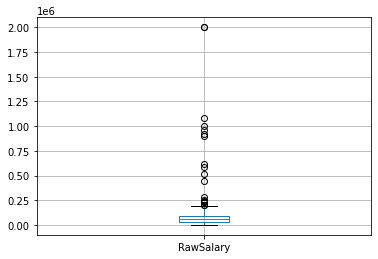

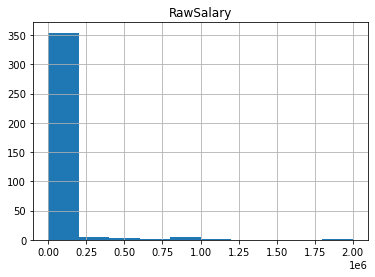

In [ ]:
# To plot you need double brackets.

df[['RawSalary']].boxplot()
df[['RawSalary']].hist()
plt.show()

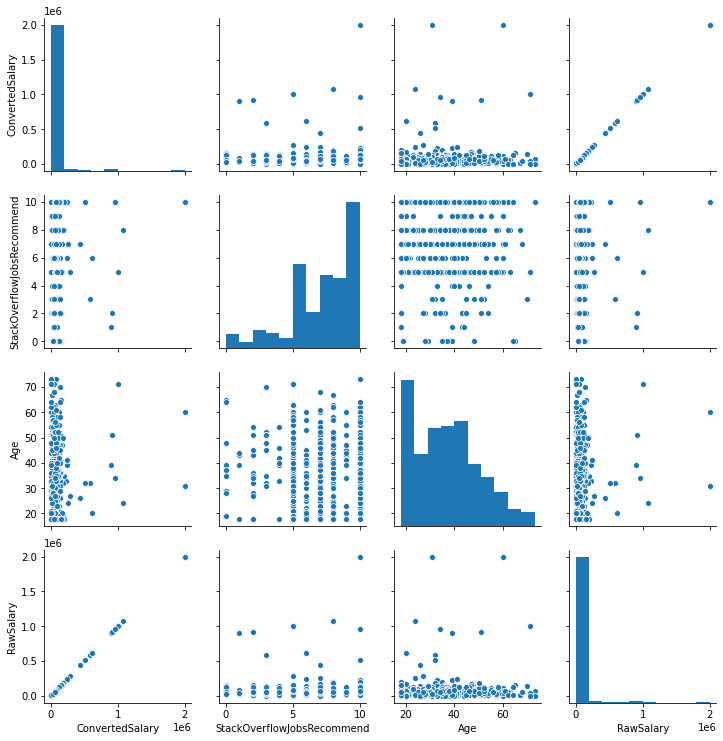

In [ ]:
import seaborn as sns

sns.pairplot(df[['ConvertedSalary', 'StackOverflowJobsRecommend',
       'Age', 'RawSalary']])

## Scaling data

### Min-max scaling

0 lowest value, 1 largest value. 
Normalization scales all points linearly between the upper and lower bound.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Age']])

df['normalized_Age'] = scaler.transform(df[['Age']])

df['normalized_Age']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1      0.363636
4      0.381818
5      0.381818
7      0.109091
10     0.145455
         ...   
984    0.509091
988    0.000000
991    0.290909
993    0.181818
995    0.163636
Name: normalized_Age, Length: 370, dtype: float64

### Standardization

Centers its distribution around 0. Mean 0, std 1.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


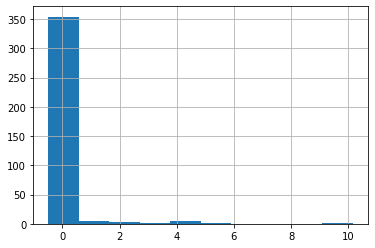

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['ConvertedSalary']])

df['normalized_ConvertedSalary'] = scaler.transform(df[['ConvertedSalary']])

df['normalized_ConvertedSalary'].hist()

### Change distribution with log transformation

When distribution have a long tail we need to change it to normal distribution

#### POWER TRANSFORMER!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


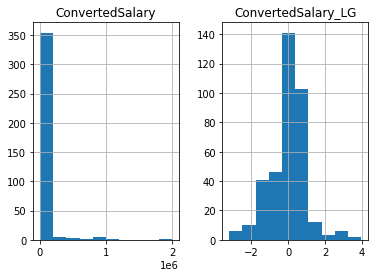

In [ ]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df[['ConvertedSalary']])

# Apply the power transform to the data
df['ConvertedSalary_LG'] = pow_trans.transform(df[['ConvertedSalary']])

# Plot the data before and after the transformation
df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

### Outliers that makes data not normal (skewed right or left)

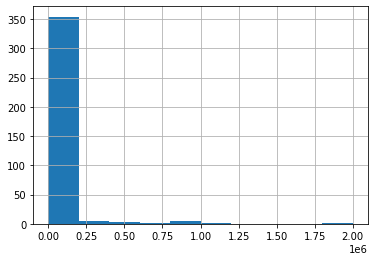

In [ ]:
# In this case outliers that skew distribution to the right
df['ConvertedSalary'].hist()

Quantile approach

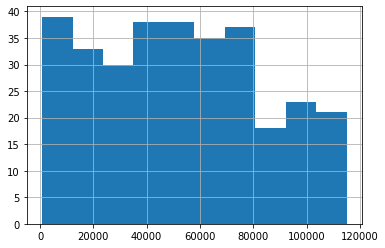

In [ ]:
q_cutoff = df['ConvertedSalary'].quantile(.95)

mask = df['ConvertedSalary'] < q_cutoff

df = df[mask]
df['ConvertedSalary'].hist()

Standard deviation approach (more than 3 std is considered outlier)



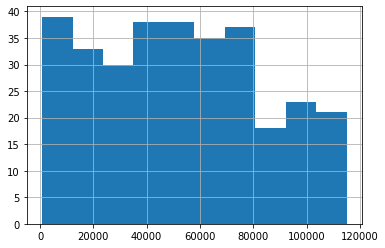

In [ ]:
mean = df['ConvertedSalary'].mean()
std = df['ConvertedSalary'].std()

lower,upper = mean - std * 3, mean + std * 3

df = df[(df['ConvertedSalary']<upper) & (df['ConvertedSalary']>lower)]
df['ConvertedSalary'].hist()

# Text encoding

Unstructured text data.



RE of all letter characters [a-zA-Z]
RE for all **non** letter characters [^a-zA-Z]




In [ ]:
speech_df = pd.read_csv('https://assets.datacamp.com/production/repositories/3752/datasets/cdc15798dd6698003ee33c6af185242faf896187/inaugural_speeches.csv')

speech_df.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


## Replace all NON letter characters

In [ ]:
# You want all NON letter characters to be transformed by a space

speech_df['text'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')
speech_df['text'].head()


0    Fellow Citizens of the Senate and of the House...
1    Fellow Citizens   I AM again called upon by th...
2    WHEN it was first perceived  in early times  t...
3    Friends and Fellow Citizens   CALLED upon to u...
4    PROCEEDING  fellow citizens  to that qualifica...
Name: text, dtype: object

## Transform all characters into lower case

In [ ]:
speech_df['text'].str.lower()
speech_df['text'].head()

0    Fellow Citizens of the Senate and of the House...
1    Fellow Citizens   I AM again called upon by th...
2    WHEN it was first perceived  in early times  t...
3    Friends and Fellow Citizens   CALLED upon to u...
4    PROCEEDING  fellow citizens  to that qualifica...
Name: text, dtype: object

## how many words there are in each speech


In [ ]:
# Count the characters in every sample with .str.len()
speech_df['char_cnt'] = speech_df['text'].str.len()
print(speech_df['char_cnt'].head())

0     8616
1      787
2    13871
3    10144
4    12902
Name: char_cnt, dtype: int64


In [ ]:
# If I want to kow the number of WORDS, split into array of words
# and then count
speech_df['word_cnt'] = speech_df['text'].str.split().str.len()
print(speech_df['word_cnt'].head())


0    1432
1     135
2    2323
3    1736
4    2169
Name: word_cnt, dtype: int64


In [ ]:
# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

## Text to columns with CountVectorizer

min_df eliminates words that occurs rarely

max_df eliminates words that occurs to many times, words like is, are, the,etc.

CountVectorizer makes a scr_matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df= 0.1,max_df=0.9)

cv.fit(speech_df['text'])
cv_transformed = cv.transform(speech_df['text'])

# or I can use the fit_transform method...


print(type(cv_transformed))

<class 'scipy.sparse.csr.csr_matrix'>


To transform to a non sparse array you can use .toarray() method.



In [ ]:
cv_array = cv_transformed.toarray()
cv_array.shape

(58, 1930)

Can get the feature names 

In [ ]:
feature_names = cv.get_feature_names()
feature_names[:5]

['abandon', 'abiding', 'ability', 'able', 'about']

Putting all into a DataFrame

In [ ]:
cv_df = pd.DataFrame(cv_transformed.toarray(),
                     columns=feature_names).add_prefix('Counts_')

cv_df.head()

,Counts_abandon,Counts_abiding,Counts_ability,Counts_able,Counts_about,Counts_above,Counts_abroad,Counts_absolute,Counts_abuse,Counts_abuses,Counts_accept,Counts_accepted,Counts_accomplish,Counts_accomplished,Counts_accomplishment,Counts_accordance,Counts_according,Counts_account,Counts_accountability,Counts_achieve,Counts_achieved,Counts_achievement,Counts_achievements,Counts_acknowledge,Counts_acknowledged,Counts_acquiescence,Counts_across,Counts_act,Counts_acted,Counts_acting,Counts_action,Counts_actions,Counts_acts,Counts_actual,Counts_adapted,Counts_add,Counts_added,Counts_additional,Counts_address,Counts_adequate,...,Counts_white,Counts_whole,Counts_wholesome,Counts_wholly,Counts_whom,Counts_whose,Counts_why,Counts_wide,Counts_willing,Counts_win,Counts_wisdom,Counts_wise,Counts_wisely,Counts_wish,Counts_wishes,Counts_within,Counts_without,Counts_witness,Counts_witnessed,Counts_women,Counts_word,Counts_words,Counts_work,Counts_working,Counts_works,Counts_worthy,Counts_would,Counts_write,Counts_written,Counts_wrong,Counts_year,Counts_years,Counts_yes,Counts_yet,Counts_yield,Counts_you,Counts_young,Counts_your,Counts_zeal,Counts_zealously
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,5,0,9,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,1,0,1,2,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,2,3,0,0,0,0,0,1,1,0
3,1,0,0,0,1,1,1,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,2,0,0,1,2,0,2,0,0,2,1,0,1,0,1,2,0,0,0,0,0,1,0,0,0,6,1,0,2,0,0,0,2,0,7,0,7,1,0
4,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,1,0,1,0,0,0,0,1,0,0,0,0,...,0,1,2,0,2,3,0,0,0,0,2,0,0,1,0,4,2,2,1,0,1,0,0,0,1,0,4,0,1,0,2,2,0,2,0,4,0,4,3,0


In [ ]:
# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address  ... Counts_zeal Counts_zealously
0  George Washington   First Inaugural Address  ...           0                0
1  George Washington  Second Inaugural Address  ...           0                0
2         John Adams         Inaugural Address  ...           1                0
3   Thomas Jefferson   First Inaugural Address  ...           1                0
4   Thomas Jefferson  Second Inaugural Address  ...           3                0

[5 rows x 1937 columns]


## TF-IDF

TF-IDF means Term frequency-inverse document frequency

The ecuation of TF-IDF has the effect of reducing the value of common words,while increasing weight of words that are not in other documents.



Tf-idf
While counts of occurrences of words can be useful to build models, words that occur many times may skew the results undesirably. To limit these common words from overpowering your model a form of normalization can be used. In this lesson you will be using Term frequency-inverse document frequency (Tf-idf) as was discussed in the video. Tf-idf has the effect of reducing the value of common words, while increasing the weight of words that do not occur in many documents.

In [ ]:
# You can put a maximum of columns created by tfidf
# In the argument stop_words there is the 'english' string. This means that a
# predefined list of common words are not going to be additioned in the TF-IDF
# These common words are: and, the, is and others.


from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  ...  TFIDF_world  TFIDF_years
0      0.000000              0.133415  ...     0.045929     0.052694
1      0.000000              0.261016  ...     0.000000     0.000000
2      0.000000              0.092436  ...     0.063643     0.073018
3      0.000000              0.092693  ...     0.095729     0.000000
4      0.041334              0.039761  ...     0.054752     0.062817

[5 rows x 100 columns]


Inspecting Tf-idf values
After creating Tf-idf features you will often want to understand what are the most highest scored words for each corpus. This can be achieved by isolating the row you want to examine and then sorting the the scores from high to low.

In [ ]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64


 fit the vectorizer only on the training data, and apply it to the test data.

 We dont have this training set, but the code is the following:

In [ ]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

## Bag of words limitations

Bag of words with countVectorizer makes only an array of isolated words

For example if I have the words Happy, it seems a positive meaning, but actually the text was written like 'i'm not happy'. This needs 2-gram

'never not happy' has a positive connotation. This needs 3-gram

## N-grams

In CountVectorizer there is an argument ngram_range= (min,max). ngram_range argument as a tuple (n1, n2) where all n-grams in the n1 to n2 range are included.

So far you have created features based on individual words in each of the texts. This can be quite powerful when used in a machine learning model but you may be concerned that by looking at words individually a lot of the context is being ignored. To deal with this when creating models you can use n-grams which are sequence of n words grouped together. For example:

bigrams: Sequences of two consecutive words
trigrams: Sequences of two consecutive words

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                         columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

['ability preserve protect', 'agriculture commerce manufactures', 'america ideal freedom', 'amity mutual concession', 'anchor peace home', 'ask bow heads', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'civil service reform', 'commerce united states', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'coordinate branches government', 'day task people', 'defend constitution united', 'distinction powers granted', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens world', 'form perfect union', 'general welfare secure', 'god bless america', 'god bless god', 'good greates